In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pytz
import os
import re

In [2]:
directory = 'HVAC/'  # Replace with your folder path
files = [file for file in os.listdir(directory) if file.endswith('.csv')]  # List all CSV files

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through the files and read each one
for file in files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Read the CSV file
    df = pd.concat([df, data], ignore_index=True)  # Concatenate to the main DataFrame

df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: np.nan if x > 1000 else x)

df.head()

,datetime,/FS5/7405/SDH.CHW2.CHP5_CT/2/presentValue,/FS5/7406/SDH.SCHWP2_VFD:CURRENT/44/presentValue,/FS5/7404/SDH.CHW1.CHP3_CT/20/presentValue,/FS5/7406/SDH.SCHWP1_VFD:POWER/41/presentValue,/FS5/7406/SDH.SCHWP2_VFD:POWER/45/presentValue,/FS5/7405/SDH.CHW2.CHP4_CT/1/presentValue,/FS5/7402/SDH.AH2B.SF_VFD:POWER/196/presentValue,/FS5/7406/SDH.SCHWP1_VFD:CURRENT/40/presentValue,/FS5/7406/SDH.AH1B.SF_VFD:CURRENT/35/presentValue,/FS5/7402/SDH.AH2B.SF_VFD:CURRENT/195/presentValue,/FS5/7406/SDH.AH1B.SF_VFD:POWER/36/presentValue,/FS5/7406/SDH.AH1A.SF_VFD:CURRENT/20/presentValue
0,2022-05-16 17:30:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-16 17:45:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-16 18:00:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-16 18:15:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-16 18:30:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.columns)

Index(['datetime', '/FS5/7405/SDH.CHW2.CHP5_CT/2/presentValue',
       '/FS5/7406/SDH.SCHWP2_VFD:CURRENT/44/presentValue',
       '/FS5/7404/SDH.CHW1.CHP3_CT/20/presentValue',
       '/FS5/7406/SDH.SCHWP1_VFD:POWER/41/presentValue',
       '/FS5/7406/SDH.SCHWP2_VFD:POWER/45/presentValue',
       '/FS5/7405/SDH.CHW2.CHP4_CT/1/presentValue',
       '/FS5/7402/SDH.AH2B.SF_VFD:POWER/196/presentValue',
       '/FS5/7406/SDH.SCHWP1_VFD:CURRENT/40/presentValue',
       '/FS5/7406/SDH.AH1B.SF_VFD:CURRENT/35/presentValue',
       '/FS5/7402/SDH.AH2B.SF_VFD:CURRENT/195/presentValue',
       '/FS5/7406/SDH.AH1B.SF_VFD:POWER/36/presentValue',
       '/FS5/7406/SDH.AH1A.SF_VFD:CURRENT/20/presentValue'],
      dtype='object')


In [4]:
def remove_before_sdh(s):
    index = s.find('SDH')
    return s[index:] if index != -1 else s

In [5]:
# Reorganize column name
suffix_to_remove = '/presentValue'

df.columns = [remove_before_sdh(col) for col in df.columns]
df.columns = [col.replace(suffix_to_remove, '') if col.endswith(suffix_to_remove) else col for col in df.columns]
df.columns = [col.split('/')[0] for col in df.columns]

df.head()

,datetime,SDH.CHW2.CHP5_CT,SDH.SCHWP2_VFD:CURRENT,SDH.CHW1.CHP3_CT,SDH.SCHWP1_VFD:POWER,SDH.SCHWP2_VFD:POWER,SDH.CHW2.CHP4_CT,SDH.AH2B.SF_VFD:POWER,SDH.SCHWP1_VFD:CURRENT,SDH.AH1B.SF_VFD:CURRENT,SDH.AH2B.SF_VFD:CURRENT,SDH.AH1B.SF_VFD:POWER,SDH.AH1A.SF_VFD:CURRENT
0,2022-05-16 17:30:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-16 17:45:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-16 18:00:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-16 18:15:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-16 18:30:00,3.078748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.columns)

Index(['datetime', 'SDH.CHW2.CHP5_CT', 'SDH.SCHWP2_VFD:CURRENT',
       'SDH.CHW1.CHP3_CT', 'SDH.SCHWP1_VFD:POWER', 'SDH.SCHWP2_VFD:POWER',
       'SDH.CHW2.CHP4_CT', 'SDH.AH2B.SF_VFD:POWER', 'SDH.SCHWP1_VFD:CURRENT',
       'SDH.AH1B.SF_VFD:CURRENT', 'SDH.AH2B.SF_VFD:CURRENT',
       'SDH.AH1B.SF_VFD:POWER', 'SDH.AH1A.SF_VFD:CURRENT'],
      dtype='object')


In [7]:
# change datetime to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].dt.tz_localize('America/Los_Angeles')

In [8]:
# split into MSA and MSB dataframe
# Define the keywords
keywords = {"power":['POWER'], 
            "current":["CURRENT", "CT"]}

columns_with_keywords = {}
# Identify columns containing the keywords
for keyword in keywords:
    # Initialize a list to hold column names for this keyword
    columns_with_keywords[keyword] = []
    
    # Inner loop iterates over each column name in the DataFrame
    for col in df.columns:
        # Check if the keyword is in the column name

        for word in keywords[keyword]:
            if word in col:
                # If yes, append the column name to the list for this keyword
                columns_with_keywords[keyword].append(col)

print("Columns with Keywords:")
print(columns_with_keywords)

# Create sub DataFrames based on identified columns
sub_dataframes = {}
for keyword, cols in columns_with_keywords.items():
    # Include the first column ('ID') and the columns with the keyword
    selected_cols = ['datetime'] + cols
    sub_dataframes[keyword] = df[selected_cols]

df_current = sub_dataframes['current'] 
df_pwr = sub_dataframes['power']

Columns with Keywords:
{'power': ['SDH.SCHWP1_VFD:POWER', 'SDH.SCHWP2_VFD:POWER', 'SDH.AH2B.SF_VFD:POWER', 'SDH.AH1B.SF_VFD:POWER'], 'current': ['SDH.CHW2.CHP5_CT', 'SDH.SCHWP2_VFD:CURRENT', 'SDH.CHW1.CHP3_CT', 'SDH.CHW2.CHP4_CT', 'SDH.SCHWP1_VFD:CURRENT', 'SDH.AH1B.SF_VFD:CURRENT', 'SDH.AH2B.SF_VFD:CURRENT', 'SDH.AH1A.SF_VFD:CURRENT']}


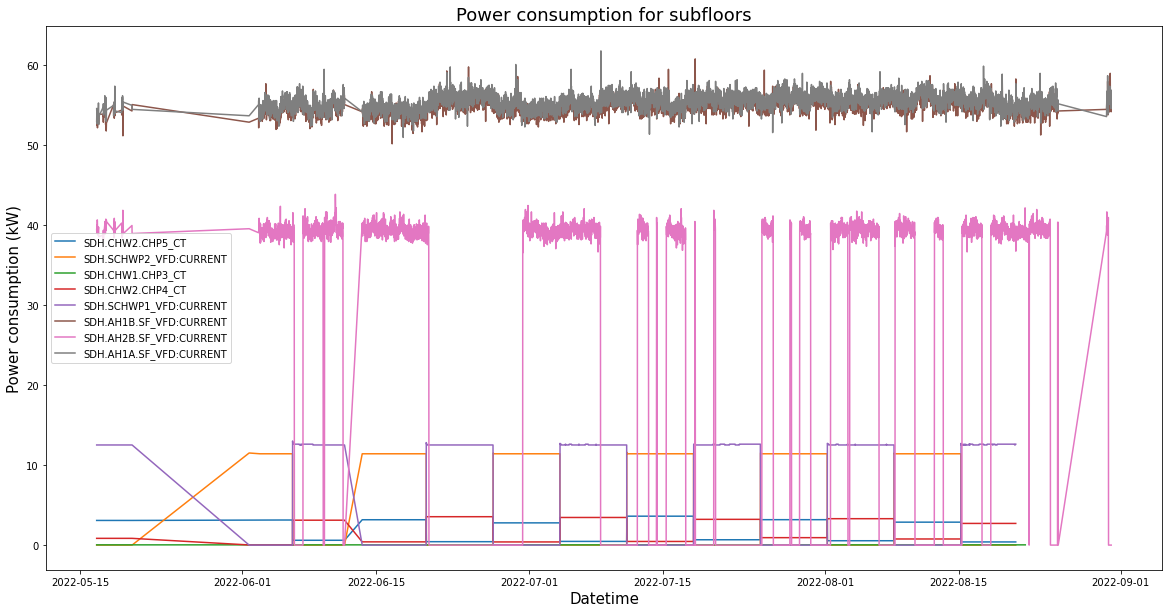

In [9]:
plt.figure(figsize=[20, 10])
for i in df_current.columns:
    if "datetime" not in i and "MAIN" not in i:
        plt.plot(df_current['datetime'], df_current[i], label = i)

plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('Power consumption (kW)', fontsize = 15)
plt.title('Power consumption for subfloors', fontsize = 18)
plt.legend()
plt.show()

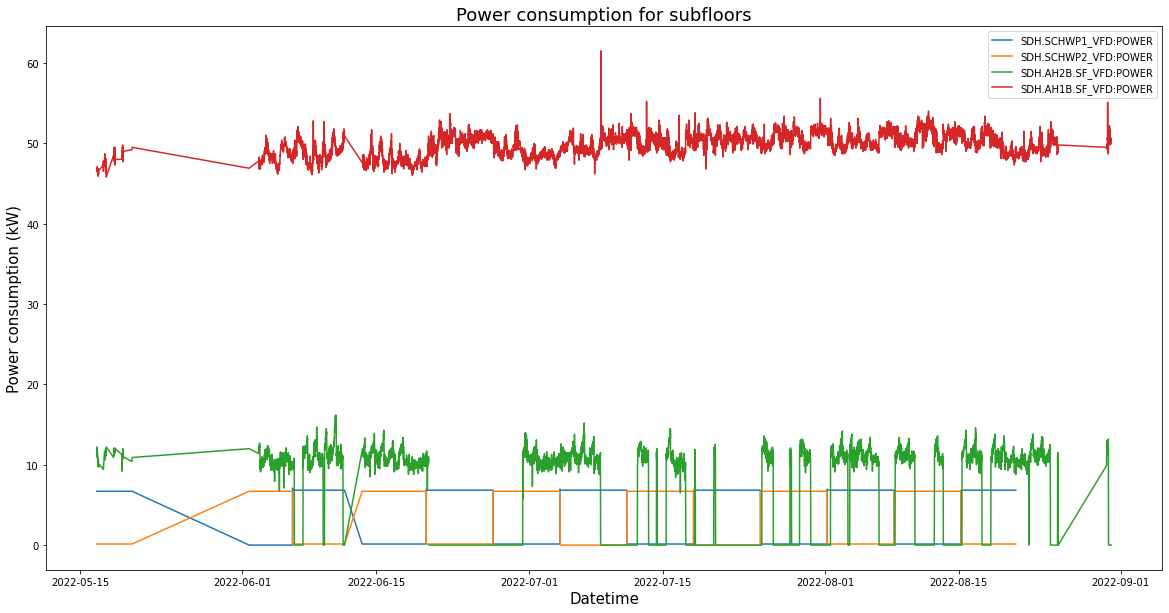

In [23]:
plt.figure(figsize=[20, 10])
for i in df_pwr.columns:
    if "datetime" not in i and "MAIN" not in i:
        plt.plot(df_pwr['datetime'], df_pwr[i], label = i)

plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('Power consumption (kW)', fontsize = 15)
plt.title('Power consumption for subfloors', fontsize = 18)
plt.legend()
plt.show()